## 군집 모델의 평가

### 1) Silhouette Coefficient ( 실루엣 계수 )

> - 군집화 결과의 품질을 측정하는데 사용되는 지표
> - 각 객체가 자신의 군집 안에서 얼마나 잘 맞는지, 다른 군집과 얼마나 잘 구분되는지를 정량화 한다
> - s(i) =  b(i)−a(i) / max(a(i),b(i))   
       
군집 내의 하나의 데이터 포인트 x에서 
- a(i)는 데이터 포인트 𝑖 가 속한 클러스터 내에서의 평균 거리입니다.
- b(i)는 데이터 포인트 𝑖 와 가장 가까운 다른 클러스터와의 평균 거리입니다.

### 실루엣 계수의 해석
> - `1에 가까운 값` : 데이터 포인트가 잘 클러스터링되었음을 의미합니다. <br>해당 포인트가 자신이 속한 클러스터 내에서 밀집되어 있고 다른 클러스터와 잘 분리되어 있다는 것을 나타냅니다.
> - `0에 가까운 값` : 데이터 포인트가 두 클러스터의 경계에 위치해 있음을 의미합니다.
> - `-1에 가까운 값` : 데이터 포인트가 잘못된 클러스터에 할당되었음을 의미합니다.<br>해당 포인트가 다른 클러스터의 중심에 더 가깝다는 것을 나타냅니다.

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [16]:
print(iris.target_names, iris.feature_names)

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
# AgglomerativeClustering (계층형 군집화 수행하기)
# 꽃 종류가 3개라서 
hier = AgglomerativeClustering(n_clusters=3)
cluster_labels = hier.fit_predict(df.iloc[:, 2:])
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [26]:
# 변수 두개 사용해서 응집률 확인하기
silhouette = silhouette_score(df.iloc[:, 2:], cluster_labels)
print("2개 변수 사용시 응집률 : " , silhouette)

2개 변수 사용시 응집률 :  0.6573949269287823


In [27]:
# 모든 변수 사용했을 때의 응집도
silhouette = silhouette_score(df, cluster_labels)
print("모든 변수 사용시 응집률 : " , silhouette)

모든 변수 사용시 응집률 :  0.5173141370124015



### => 시각화

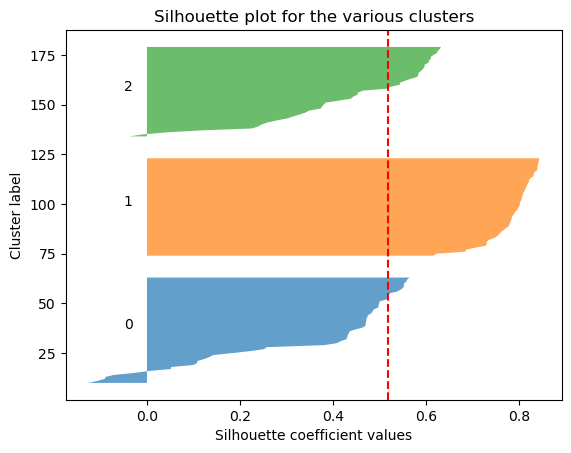

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

# Calculate the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, cluster_labels)

y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# 전체 실루엣 평균값
plt.axvline(x=silhouette, color="red", linestyle="--")
plt.show()